# Real-world Data Wrangling Project

In [7]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import requests

## 1. Gather data

India's economy is based on agriculture, which employs a large section of the workforce and is essential to providing food security. Soil health is one of the main factors affecting agricultural output. Crop growth and yield are greatly influenced by the soil's composition, nutrients, moisture content, and other elements. To make wise decisions for sustainable agricultural methods, however, reliable and thorough data analysis is required due to the various and complex nature of Indian soils.

### 1.1. Problem Statement

The "Enhancing Agricultural Productivity through Soil Data Wrangling in Rajasthan India" initiative seeks to process, clean, and integrate various soil data sources from all around the nation by utilizing data wrangling techniques. By doing this, the project hopes to offer farmers, academics, and decision-makers practical information that help guide the optimization of agricultural methods and increase crop yields.

### 1.2. Gather at least two datasets using two different data gathering methods

List of data gathering methods:

1.tableConvert.com_ao3lof.sql [tabular data water analysis ]

A computer language called SQL (Structured Query Language) is used to manage and work with relational databases. It is employed for the creation, modification, and retrieval of structured data. 


2.archive (4).zip [containing soil analysis data]

We must extract a zip file's contents in order to deal with the data it contains. To handle zip files, the majority of computer languages include libraries or modules. The zipfile module in Python is frequently employed. 

#### **Dataset 1**

Type: *api data*

Method: *url*( http://127.0.0.1:5000/water_usage_data)

Dataset variables:

*   *Variable 1 Water Consumption (liters/hectare)*
*   *Variable 2 Water Availability (liters/hectare)*

In [8]:

import csv

# Make a GET request to the API endpoint
response = requests.get("http://127.0.0.1:5000/water_usage_data")

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()

    # Specify CSV file name
    csv_filename = "extracted_data.csv"

    # Write data to CSV file
    with open(csv_filename, mode="w", newline="", encoding="utf-8") as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=data[0].keys())
        csv_writer.writeheader()
        csv_writer.writerows(data)

    print(f"Data has been extracted and saved to {csv_filename}")
else:
    print("Failed to retrieve data from the API.")




Data has been extracted and saved to extracted_data.csv


In [9]:
# Extracting data from extracted_data.csv that i had convert from api
water_data = pd.read_csv('extracted_data.csv')
water_data.head()

Crop  District     Irrigation Method  \
0  Garlic   Udaipur             Tube Well   
1    Gram  Bhilwara       Drip Irrigation   
2   Guava   Udaipur      Canal Irrigation   
3  Barley   Jodhpur  Sprinkler Irrigation   
4    Gram     Alwar      Canal Irrigation   

   Water Availability (liters/hectare)  Water Consumption (liters/hectare)  
0                         11335.919980                        11609.330890  
1                         12091.900250                        12648.406040  
2                          9810.943169                        10063.162450  
3                         10754.217310                        10110.539990  
4                          8695.537819                         9320.451018

#### Dataset 2

Type: zip file

Method: *kaggle* ( The data was gathered using the "zip" method from kaggle.)

Dataset variables:

*   *Variable 1 pH Level*
*   *Variable 2 Organic Matter (%)*

In [10]:
#FILL IN - unzip the zip file in read mode using a context manager
with zipfile.ZipFile("archive (4).zip","r") as zip_ref:
    zip_ref.extractall("archive (4)/")

In [11]:
df = pd.read_csv('archive (4)/soil_analysis_data.csv')

In [12]:
df


District            Soil Type  pH Level  Organic Matter (%)  \
0         Jaipur  Chalky (Calcareous)  6.546096            1.569807   
1       Bhilwara          Nitrogenous  6.832259            2.243018   
2        Jodhpur                Sandy  7.453182            2.662898   
3         Jaipur                 Clay  8.019189            1.240327   
4         Jaipur                Sandy  8.100131            1.768419   
..           ...                  ...       ...                 ...   
995       Nagaur               Saline  7.660465            1.506067   
996  Hanumangarh               Saline  7.035537            1.747936   
997        Ajmer  Chalky (Calcareous)  7.079614            2.110315   
998      Jodhpur          Nitrogenous  8.104615            1.987857   
999       Jaipur          Nitrogenous  8.604928            2.163497   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                   27.931972                   29.438438   
1                   22.263480                   25.413455   
2                   23.564182                   13.014409   
3                   15.839222                   17.744206   
4                   27.942867                   25.769504   
..                        ...                         ...   
995                 33.615190                   20.427567   
996                 29.635712                   29.446394   
997                 28.239561                   21.623791   
998                 38.194803                   24.540113   
999                 25.824377                   28.264565   

     Potassium Content (kg/ha)  
0                    42.782766  
1                    37.644377  
2                    37.082003  
3                    42.758704  
4                    30.651292  
..                         ...  
995                  31.421458  
996                  41.190857  
997                  42.902838  
998                  36.462802  
999                  50.388888  

[1000 rows x 7 columns]

## 2. Assess data

In [13]:
water_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Crop                                 1000 non-null   object 
 1   District                             1000 non-null   object 
 2   Irrigation Method                    1000 non-null   object 
 3   Water Availability (liters/hectare)  998 non-null    float64
 4   Water Consumption (liters/hectare)   997 non-null    float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


### 1. Completeness
Interpretation: Looking at the summary of the water_data DataFrame returned by .info we can see that there are only 997 Water Consumption (liters/hectare) and 998  Water Availability (liters/hectare)  entries while there are 1000entries for the other columns.

In [14]:
water_data.dtypes

Crop                                    object
District                                object
Irrigation Method                       object
Water Availability (liters/hectare)    float64
Water Consumption (liters/hectare)     float64
dtype: object

In [15]:
water_data.describe()

Water Availability (liters/hectare)  Water Consumption (liters/hectare)
count                         9.980000e+02                        9.970000e+02
mean                          7.499440e+10                        5.677814e+11
std                           2.369158e+12                        1.792787e+13
min                           0.000000e+00                        0.000000e+00
25%                           8.142272e+03                        8.232959e+03
50%                           1.052448e+04                        1.041645e+04
75%                           1.288012e+04                        1.281970e+04
max                           7.484440e+13                        5.660780e+14

### 2. Accuracy

There is a minimum amount of water consumption, and water availability is zero.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [17]:
df.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  1000.000000         1000.000000               1000.000000   
mean      7.495453            1.993592                 29.883358   
std       0.517155            0.515340                  5.202697   
min       5.889492            0.155817                 11.994574   
25%       7.157881            1.638911                 26.217325   
50%       7.500129            1.981462                 29.822797   
75%       7.846940            2.345688                 33.232056   
max       9.038430            3.764528                 45.760284   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                 1000.000000                1000.000000  
mean                    19.729932                  39.877907  
std                      5.067005                   4.874751  
min                      4.961838                  24.116481  
25%                     16.216471                  36.703917  
50%                     19.913737                  39.796016  
75%                     23.122285                  43.382039  
max                     35.588406                  54.678290

Data leads us to believe that we can create groups by district and soil type.


There is an structure issue to solve this issue we will combine the data from water and soil data analysis file

###  water_data_analysis
We came to the conclusion that the data in the water_data_analyasis is incorrect since there are missing numbers and the district name is repeated a lot based on the information provided above and the approach described.

### soil_data_analysis

The data can be divided based on the fundamental characteristics of the soil as well as on a district level that is simple to visualize.

### 3. Clean data

In [18]:
cleaned_water = water_data.copy()
cleaned_water

Crop        District     Irrigation Method  \
0      Garlic         Udaipur             Tube Well   
1        Gram        Bhilwara       Drip Irrigation   
2       Guava         Udaipur      Canal Irrigation   
3      Barley         Jodhpur  Sprinkler Irrigation   
4        Gram           Alwar      Canal Irrigation   
..        ...             ...                   ...   
995  Oilseeds         Udaipur  Sprinkler Irrigation   
996    Tomato         Jodhpur  Sprinkler Irrigation   
997     Bajra            Kota      Canal Irrigation   
998    Fennel        Bhilwara       Drip Irrigation   
999   Mustard  Sri Ganganagar             Tube Well   

     Water Availability (liters/hectare)  Water Consumption (liters/hectare)  
0                           11335.919980                        11609.330890  
1                           12091.900250                        12648.406040  
2                            9810.943169                        10063.162450  
3                           10754.217310                        10110.539990  
4                            8695.537819                         9320.451018  
..                                   ...                                 ...  
995                          7206.450194                         7842.481531  
996                          6986.421839                         7868.457709  
997                         13746.172390                        13002.941290  
998                         13609.183530                        14276.931270  
999                          6140.081509                         7011.556634  

[1000 rows x 5 columns]

In [19]:
new_column_names = {
    'Irrigation Method': 'Irrigation_Method',
    'Water Consumption (liters/hectare)': 'Water_Consumption',
    'Water Availability (liters/hectare)': 'Water_Availability'
}

cleaned_water.rename(columns=new_column_names, inplace=True)

In [20]:
cleaned_water.head()

Crop  District     Irrigation_Method  Water_Availability  \
0  Garlic   Udaipur             Tube Well        11335.919980   
1    Gram  Bhilwara       Drip Irrigation        12091.900250   
2   Guava   Udaipur      Canal Irrigation         9810.943169   
3  Barley   Jodhpur  Sprinkler Irrigation        10754.217310   
4    Gram     Alwar      Canal Irrigation         8695.537819   

   Water_Consumption  
0       11609.330890  
1       12648.406040  
2       10063.162450  
3       10110.539990  
4        9320.451018

In [21]:
cleaned_water['Irrigation_Method'].value_counts()

Irrigation_Method
Sprinkler Irrigation    284
Tube Well               252
Drip Irrigation         243
Canal Irrigation        221
Name: count, dtype: int64

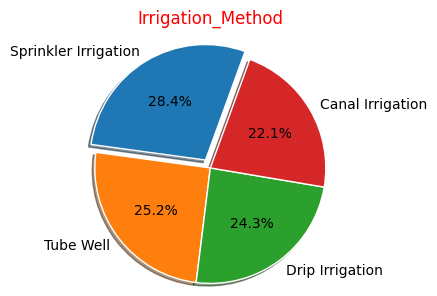

In [24]:
plt.figure(figsize=(5,3))
mylabels=['Sprinkler Irrigation','Tube Well','Drip Irrigation','Canal Irrigation']

explode=(0.1,0,0,0)
plt.pie(cleaned_water['Irrigation_Method'].value_counts(),labels=mylabels, autopct='%0.1f%%', radius =1.25 , wedgeprops={'edgecolor':'white'}
        ,textprops={'size':10,},shadow=True, startangle= 70 ,explode=explode )

plt.title("Irrigation_Method\n", color='red')
plt.show()
# Sprinkler Irrigation is prefered by 28.4% Farmers, than Tube well. 

### Sprinkler Irrigation is prefered by 28.4% Farmers, than Tube well.

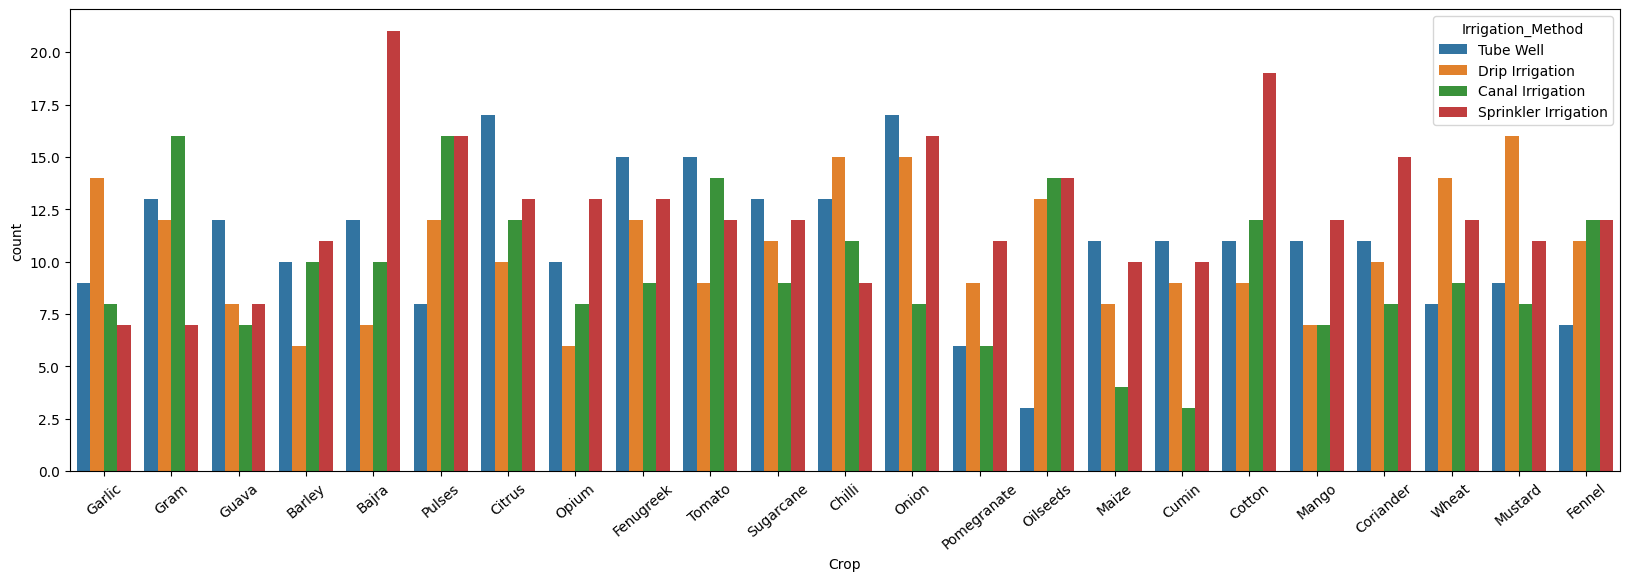

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x='Crop',hue='Irrigation_Method', data= cleaned_water)
plt.xticks(rotation=40)
plt.show()


 Bajra crop farmers used sprinkler Irrigation the most.
 Gram & Pulses Farmers used Canal Irrigation the most.
 Mustard & Onion Farmers used Drip Irrigation the most.
 Citrus & Onion Farmers used Tube well Irrigation the most.


In [21]:
plt.figure(figsize=(15,5))

wu = cleaned_water.groupby(['Crop'])['Water_Consumption'].max().sort_values(ascending=False)[0:10]
g= sns.barplot(x=wu.values, y = wu.index, data = cleaned_water, palette='rocket')

for i in range(10):
    value = wu[i]
    g.text(x=value, y = i +0.125, s= value, color= 'red', ha='right', fontsize=10)

plt.xlabel('Water Consumption (l/h)')
plt.title('Top 10 Crops with Heighest Water Consumption', color='black')
plt.show()

# Garlic consume water the most followed by fennel & Pomegranate.

In [22]:
plt.figure(figsize=(15,5))

wu = cleaned_water.groupby(['District'])['Water_Availability'].max().sort_values(ascending=False)[0:10]
g= sns.barplot(x=wu.values, y = wu.index, data = cleaned_water, palette='mako')

for i in range(10):
    value = wu[i]
    g.text(x=value, y = i +0.125, s= value, color= 'Orange', ha='right', fontsize=10)

plt.xlabel('Water Availability (l/h)')
plt.title('Top 10 Districts with Heighest Water Availability', color='black')
plt.show()

As the above graph having missing data that creataing the worng prediction

In [23]:
cleaned_df = cleaned_water.dropna()
cleaned_df.describe()

Water_Consumption  Water_Availability
count       9.960000e+02        9.960000e+02
mean        5.683514e+11        7.514499e+10
std         1.793687e+13        2.371536e+12
min         0.000000e+00        0.000000e+00
25%         8.238227e+03        8.140346e+03
50%         1.042266e+04        1.051382e+04
75%         1.282353e+04        1.288557e+04
max         5.660780e+14        7.484440e+13

In [24]:
cleaned_df.isna().sum()

District              0
Crop                  0
Irrigation_Method     0
Water_Consumption     0
Water_Availability    0
dtype: int64

We had Eleminate the data which having the zeros

In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            996 non-null    object 
 1   Crop                996 non-null    object 
 2   Irrigation_Method   996 non-null    object 
 3   Water_Consumption   996 non-null    float64
 4   Water_Availability  996 non-null    float64
dtypes: float64(2), object(3)
memory usage: 46.7+ KB


As we see the privisouly the data was about 1000 entries after removing the 0 it remains 996


### Data grouping for accurate visualization of water and soil data

In [26]:
advm = pd.merge(cleaned_df, df, on=['District'], how='right')
advm.head()

District         Crop     Irrigation_Method  Water_Consumption  \
0   Jaipur  Pomegranate  Sprinkler Irrigation        6516.406866   
1   Jaipur        Opium      Canal Irrigation           0.000000   
2   Jaipur        Mango             Tube Well       12977.277740   
3   Jaipur         Gram      Canal Irrigation        8239.982405   
4   Jaipur        Onion  Sprinkler Irrigation        9916.312266   

   Water_Availability            Soil Type  pH Level  Organic Matter (%)  \
0         5629.616415  Chalky (Calcareous)  6.546096            1.569807   
1         8984.565487  Chalky (Calcareous)  6.546096            1.569807   
2        12286.889130  Chalky (Calcareous)  6.546096            1.569807   
3         9048.975322  Chalky (Calcareous)  6.546096            1.569807   
4         9189.075187  Chalky (Calcareous)  6.546096            1.569807   

   Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                 27.931972                   29.438438   
1                 27.931972                   29.438438   
2                 27.931972                   29.438438   
3                 27.931972                   29.438438   
4                 27.931972                   29.438438   

   Potassium Content (kg/ha)  
0                  42.782766  
1                  42.782766  
2                  42.782766  
3                  42.782766  
4                  42.782766

geting the head of the file data

In [27]:
advm_gm = pd.merge(cleaned_df, df, on=['District'], how='left')
advm_gm.tail()

District     Crop Irrigation_Method  Water_Consumption  \
99070  Sri Ganganagar  Mustard         Tube Well        7011.556634   
99071  Sri Ganganagar  Mustard         Tube Well        7011.556634   
99072  Sri Ganganagar  Mustard         Tube Well        7011.556634   
99073  Sri Ganganagar  Mustard         Tube Well        7011.556634   
99074  Sri Ganganagar  Mustard         Tube Well        7011.556634   

       Water_Availability            Soil Type  pH Level  Organic Matter (%)  \
99070         6140.081509  Chalky (Calcareous)  6.664119            3.355166   
99071         6140.081509                 Clay  8.157113            2.356633   
99072         6140.081509                 Clay  8.096793            1.329756   
99073         6140.081509          Nitrogenous  8.155303            2.585551   
99074         6140.081509                Sandy  8.549704            1.979376   

       Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
99070                 32.599355                   21.050042   
99071                 24.870176                   23.036445   
99072                 28.400869                   20.721550   
99073                 23.717173                   26.446015   
99074                 40.795606                   20.456574   

       Potassium Content (kg/ha)  
99070                  43.075820  
99071                  47.339252  
99072                  30.831471  
99073                  38.409207  
99074                  38.097720

geting the tail of the file data

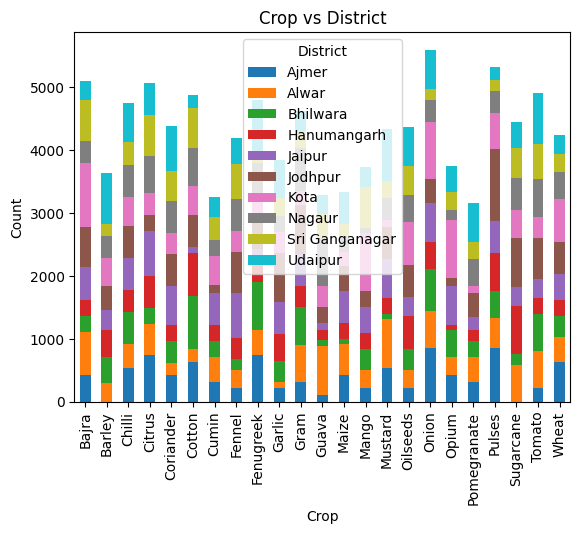

In [28]:
crop_district_counts = advm_gm.groupby(['Crop', 'District']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data1 = crop_district_counts.pivot(index='Crop', columns='District', values='Count')

# Create a bar plot
pivot_data1.plot(kind='bar', stacked=True)
plt.title('Crop vs District')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.legend(title='District')

plt.show()

In [29]:
visulization of dta

SyntaxError: invalid syntax (498360974.py, line 1)

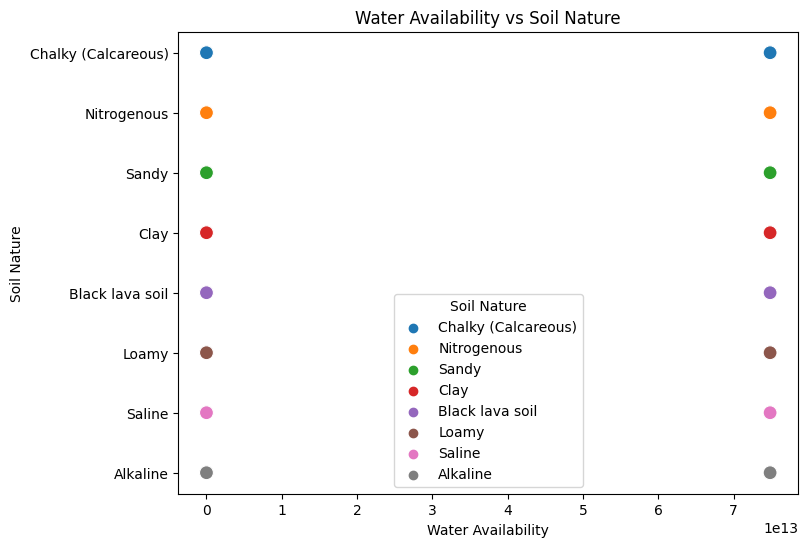

In [30]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=advm, x='Water_Availability', y='Soil Type', hue='Soil Type', s=100)
plt.title('Water Availability vs Soil Nature')
plt.xlabel('Water Availability')
plt.ylabel('Soil Nature')
plt.legend(title='Soil Nature')

plt.show()

graph betwwen the Soil Type and Water_Availability that help us to visulized the data of two files at onces



In [35]:
advm.to_html('advm_new.html', index=False)

In [34]:
advm.to_csv('advm_gm_new.csv', index=False)

An essential component of numerous scientific, environmental, agricultural, and engineering initiatives is the examination of soil and water data. Data on the characteristics, qualities, composition, and behavior of soil and water are collected, processed, and interpreted as part of this sort of investigation. The conclusions drawn from such evaluations can have significant ramifications for managing water resources, land management, environmental preservation, and other areas.

If I had more time, I would take the time to thoroughly address every problem and try to add more information so that the issues and their solutions could be visualized.

Add more graphs as well, and perhaps a proper case study regarding this project.

In [1]:
!python -m nbconvert --to html real.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'real.ipynb' matched no files
